This page is taken from Github: https://github.com/eliorc/node2vec

In [1]:
### 导入必要的包
import networkx as nx
from node2vec import Node2Vec

# 导入 Karate 示例图
G1 = nx.karate_club_graph()
# Create a graph
G2 = nx.fast_gnp_random_graph(n=100, p=0.5)
graphs = []
graphs.append(G1)
graphs.append(G2)

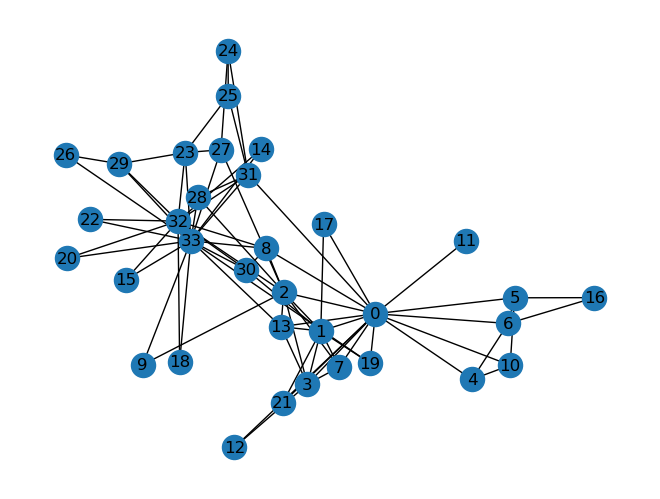

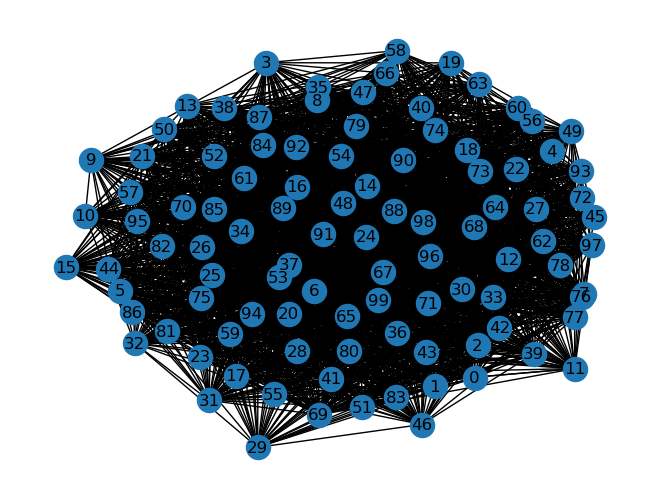

In [2]:
### 把图画出来看一看
import matplotlib.pyplot as plt

# Iterate over the graphs in the list
for graph in graphs:
    # Create a new figure for each graph
    plt.figure()
    # Draw the graph with labels
    nx.draw(graph, with_labels=True)
    # Show the figure
    plt.show()


In [3]:
%%time
# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec_G1 = Node2Vec(G1, dimensions=2, walk_length=12, num_walks=50, workers=4)  #, temp_folder='test'
 
# Embed nodes
model_G1 = node2vec_G1.fit(window=10, min_count=1, batch_words=4)  
# Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)
model_G1.wv.save_word2vec_format('Karate_Embedding')

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 13/13 [00:00<00:00, 838.04it/s]

CPU times: user 619 ms, sys: 226 ms, total: 844 ms
Wall time: 5.76 s


In [4]:
%%time
# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec_G2 = Node2Vec(G2, dimensions=64, walk_length=30, num_walks=200, workers=8) #, temp_folder='test' # Use temp_folder for big graphs
 
# Embed nodes 
model_G2 = node2vec_G2.fit(window=10, min_count=1, batch_words=4)  
# Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]





Generating walks (CPU: 3): 100%|██████████| 25/25 [00:00<00:00, 31.33it/s]

CPU times: user 16.5 s, sys: 1.62 s, total: 18.1 s
Wall time: 14.5 s


In [5]:
### 查看图 G1 中与 '0'最相似的顶点
### 注意 使用 node2vec 这个包时 输出的顶点嵌入其index均为文本格式 例如 '0'
model_G1.wv.most_similar('0') 
### 输出的好像是相似度？？

[('11', 0.9999127388000488),
 ('17', 0.9995517730712891),
 ('21', 0.9973787665367126),
 ('4', 0.9911697506904602),
 ('7', 0.9904895424842834),
 ('12', 0.989967405796051),
 ('10', 0.9881401062011719),
 ('16', 0.9874187111854553),
 ('6', 0.9851399064064026),
 ('5', 0.9846760630607605)]

In [6]:
### in graph G1, Access the embedding of sample nodes
for i in range(8):
    embedding = model_G1.wv[f'{i}']
    print(f"Node {i} is embedded as vector:\n {embedding}.\n")

Node 0 is embedded as vector:
 [-0.43598738  1.5204566 ].

Node 1 is embedded as vector:
 [-0.60374224  1.1328737 ].

Node 2 is embedded as vector:
 [-0.75888634  0.8307941 ].

Node 3 is embedded as vector:
 [-0.5961351  1.0976721].

Node 4 is embedded as vector:
 [-0.3149301  2.137782 ].

Node 5 is embedded as vector:
 [-0.25240287  2.4190032 ].

Node 6 is embedded as vector:
 [-0.26112604  2.439255  ].

Node 7 is embedded as vector:
 [-0.5534311  1.2483938].



In [7]:
### in graph G2, Access the embedding of sample nodes
for i in range(2):
    embedding = model_G2.wv[f'{i}']
    print(f"Node {i} is embedded as vector:\n {embedding}.\n")

Node 0 is embedded as vector:
 [ 0.10283478 -0.1662764   0.00869318  0.00313858 -0.0550759  -0.05296325
 -0.11872754 -0.04592444 -0.07058467 -0.03896812 -0.07788849 -0.17417215
  0.04495875 -0.05353901 -0.07244246  0.16614248  0.04969421  0.04232385
  0.12040234  0.15986551  0.11244    -0.10422461  0.24645466  0.02125196
 -0.07671927  0.18722822 -0.13586058  0.02583193  0.01068275 -0.0285067
 -0.10262679  0.179557   -0.15176195 -0.06061529 -0.02899014 -0.10069377
 -0.08811098  0.1187469  -0.03388821 -0.16201559  0.14559571 -0.02752796
 -0.284311    0.12929663 -0.06751841 -0.01923336  0.01742852  0.11638939
  0.09831251  0.09808548 -0.18745641 -0.24148354  0.2124671   0.23209338
 -0.05159983 -0.13123739 -0.17242987 -0.06099034  0.03241464  0.21537033
  0.03386295 -0.01486788 -0.103226   -0.05671419].

Node 1 is embedded as vector:
 [ 0.01294883  0.02654127 -0.00675859  0.04796996 -0.12440749 -0.13292128
 -0.04509247  0.01420614 -0.1389028   0.01064561  0.08242483 -0.26200077
 -0.0053490